In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from PIL import Image
%matplotlib inline

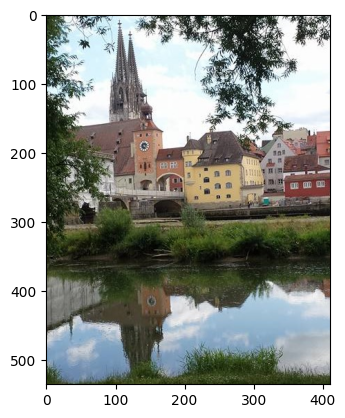

In [2]:
original_img = plt.imread('Homepage2.png')
plt.imshow(original_img)

In [3]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (535, 411, 3)


In [4]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [5]:
#for each X identify the closest centroid
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    m= X.shape[0]
    distance=[]
    for i in range(m):
        for j in range(K):
            norm= np.linalg.norm(X[i]-centroids[j])**2
            distance.append(norm)
    s= np.array(distance)
    s= s.reshape(-1, K)
    
    p= s.shape[1]
    b= np.argmin(s, axis= 1)
    idx+=b
    
    return idx

In [6]:
#update each centroid by averaging the values of X assigned to it
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for j in range(K):
        point= sum(X[idx==j])
        centroids[j]= 1/len(X[idx==j])*point
    return centroids

In [7]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [10]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

In [11]:
#Experiment with different numbers for K and max_iters to optimize quality for size
K = 25
max_iters = 12

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/11
K-Means iteration 1/11
K-Means iteration 2/11
K-Means iteration 3/11
K-Means iteration 4/11
K-Means iteration 5/11
K-Means iteration 6/11
K-Means iteration 7/11
K-Means iteration 8/11
K-Means iteration 9/11
K-Means iteration 10/11
K-Means iteration 11/11


<Figure size 800x600 with 0 Axes>

In [12]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

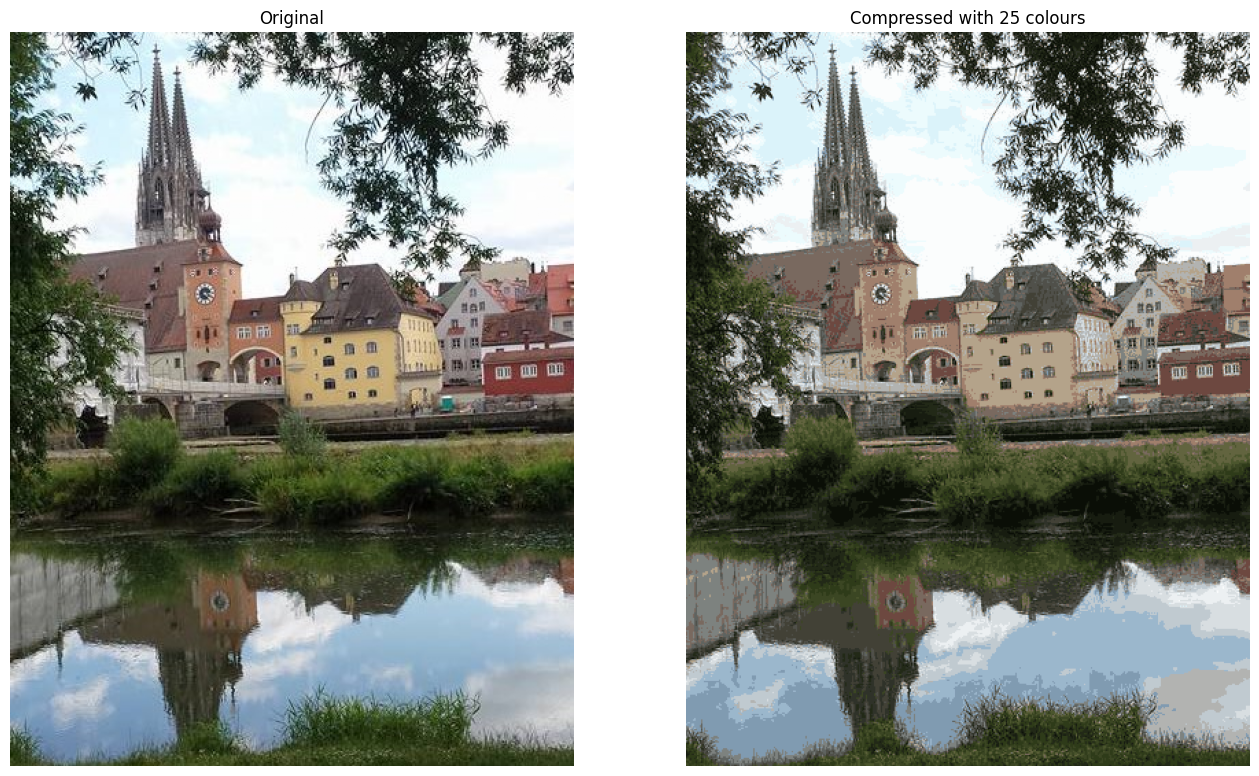

In [14]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()
plt.show()

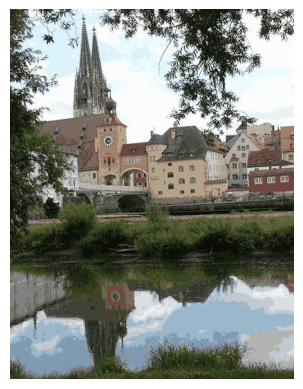

In [15]:
#Compare image size to original. Check working directory file for png image and compare compressed size to original.
plt.axis('off')
plt.imshow(X_recovered)
plt.savefig('comp_image.png', transparent= 'True')
